In [2]:
import numpy as np
import time
from tqdm import tqdm, trange
from WLM import WLChain
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat

<Figure size 1152x1152 with 0 Axes>

## no stretch

In [3]:
## Chain parameters
# Coordinate of C atoms in each unit
# unit_C = load('b_c.dat')';
unit_C = np.zeros((3,1))

# Degree of polymerization
N_backbone = 5000

# Chain stiffness (placeholder)
a_backbone = 1

# Unit persistence
lambda_backbone = 1

In [4]:
kappa_list = np.array([5,50,500])
epsilon_list = [0]
parameters_list = []
for kappa in kappa_list:
    for epsilon in epsilon_list:
        parameters_list.append([kappa, epsilon])
        

[5, 0]
[50, 0]
[500, 0]


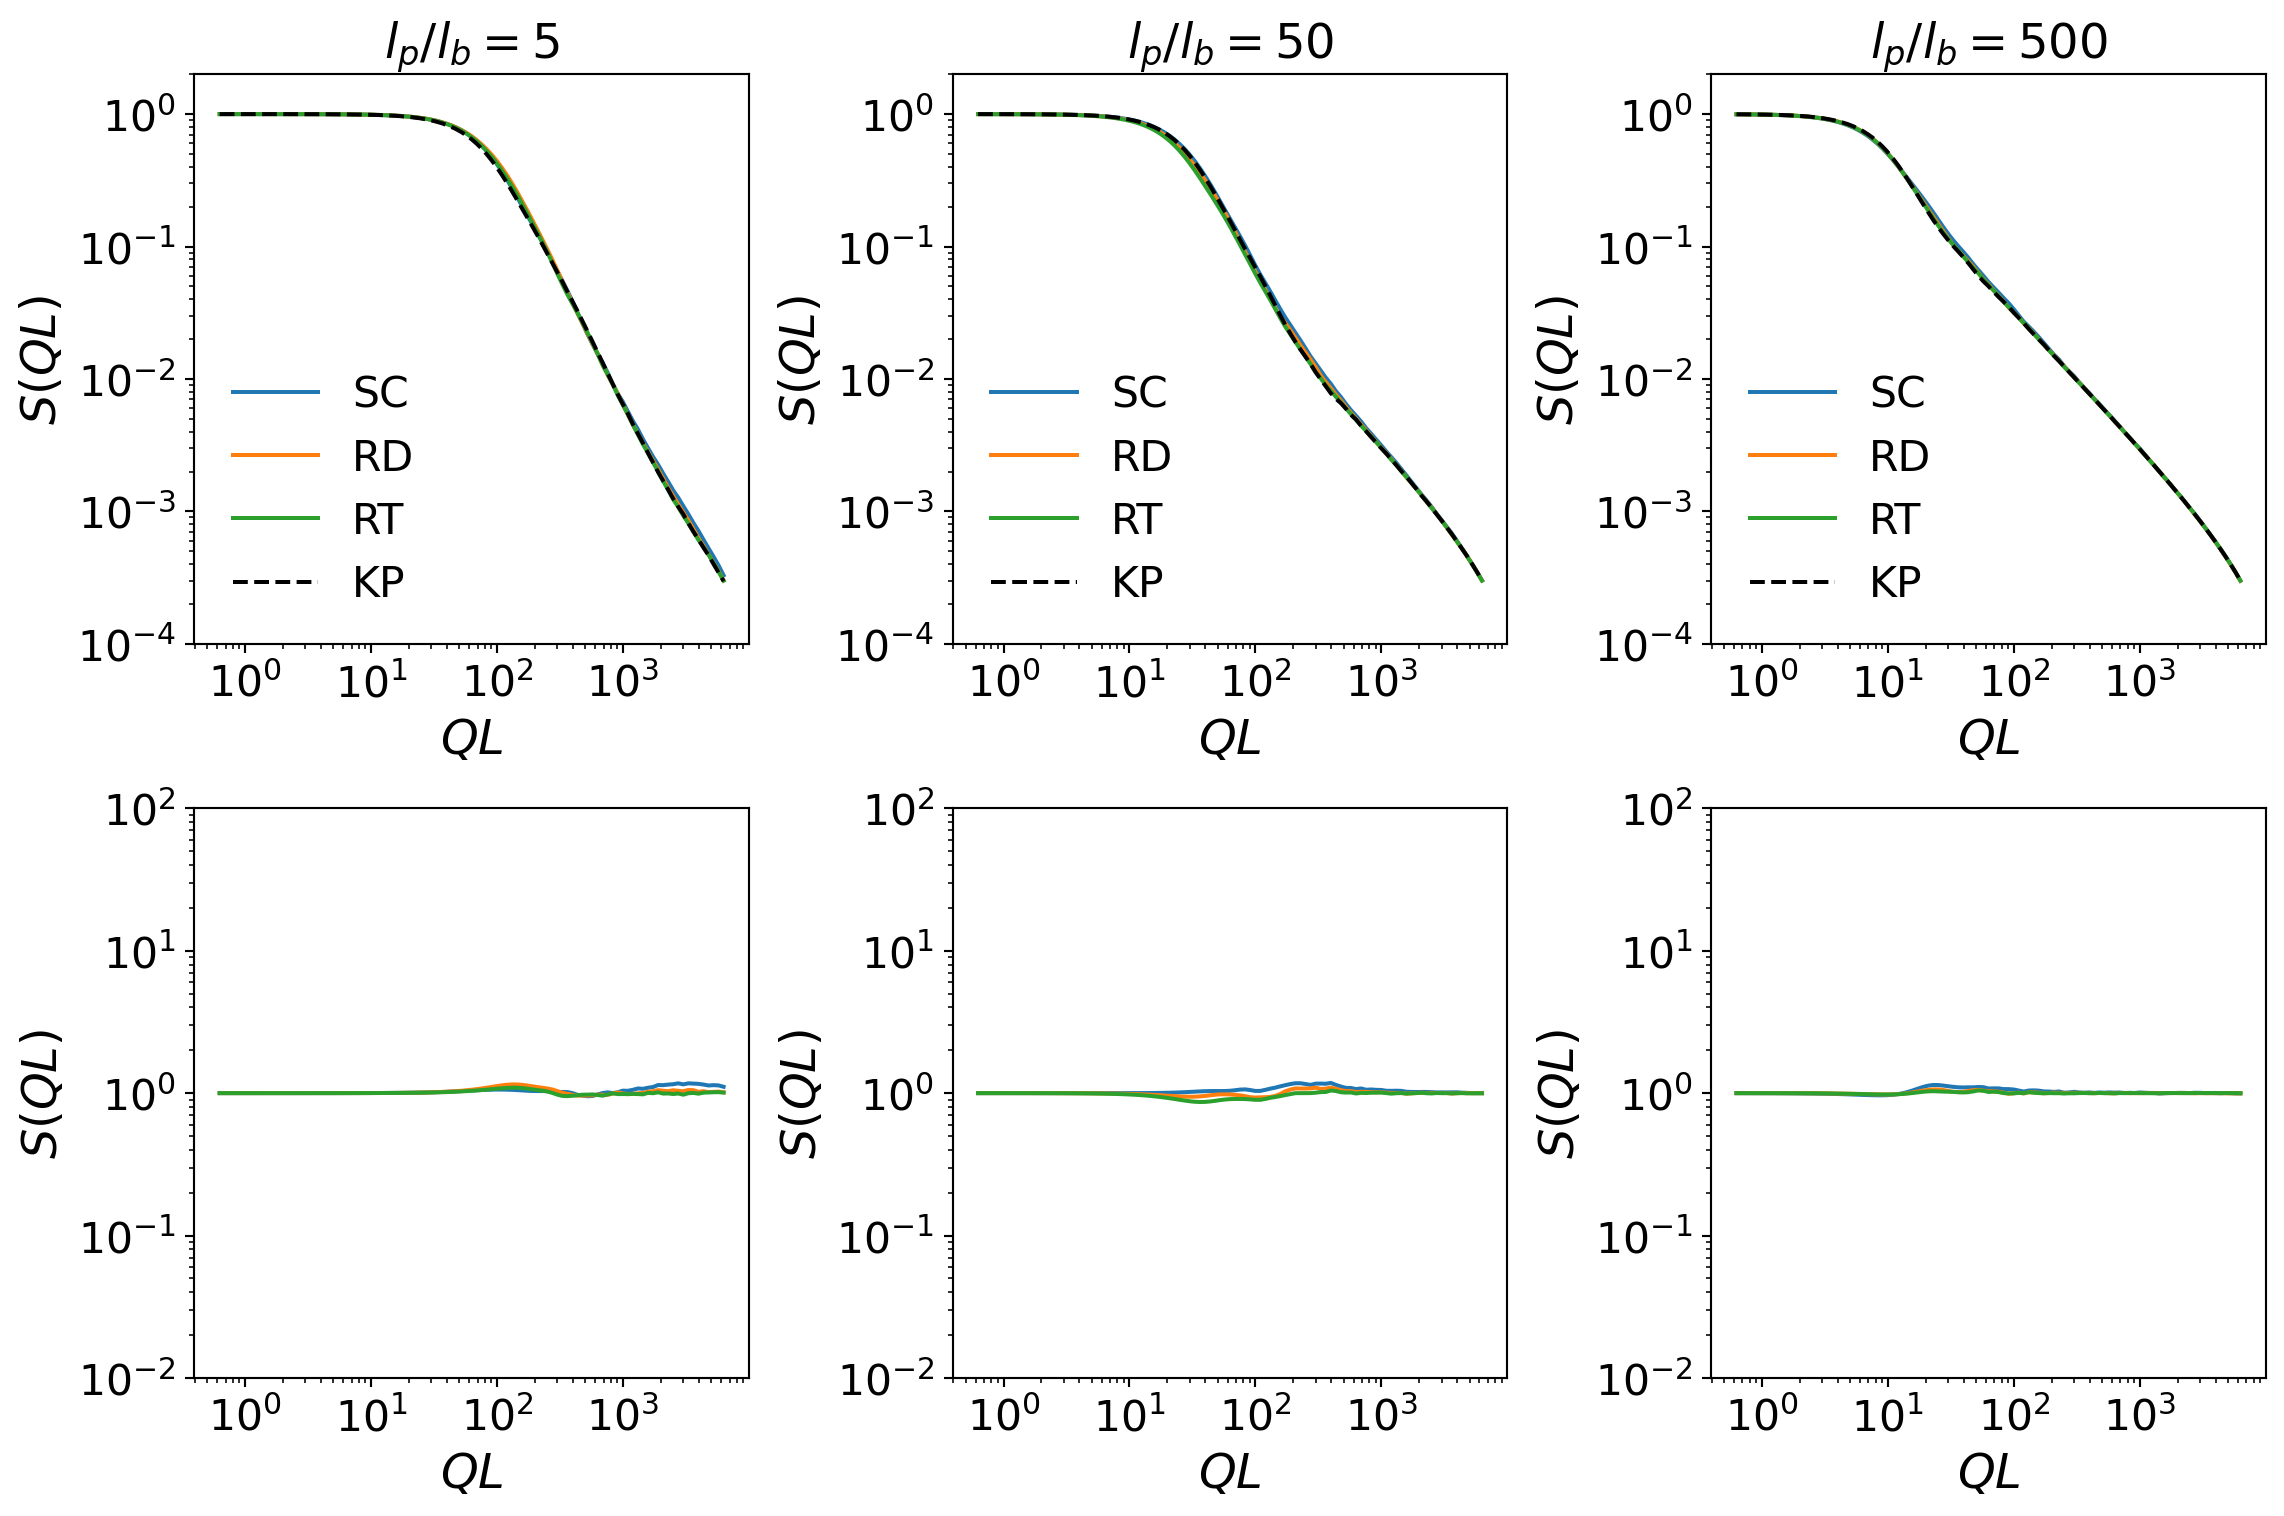

In [5]:
fig = plt.figure(figsize=(12, 8),dpi=192)

for j, params in enumerate(parameters_list):
    kappa = params[0]
    epsilon = params[1]
    print(params)

    filename = "./mat/sq_m1_64_{:}_{:}.mat".format(float(params[0]),float(params[1]))

    data = loadmat(filename)
    S_q_list_param = data["S_q_list_param"][0]
    qq = data["qq"][0]

    ax = fig.add_subplot(2,3,j+1)
    ax.set_title(r'$l_p/l_b = {}$'.format(kappa),fontsize=18)
    for i, grid in enumerate(['SC','RD','RT']):
        ax.plot(qq*N_backbone,S_q_list_param[i], label=grid)
    ax.plot(qq*N_backbone,S_q_list_param[3], '--', label='KP', color='k')
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(fontsize=16, frameon=False)
    ax.set_ylim([1e-4,2])
    ax.set_xlabel(r'$QL$',fontsize=18)
    ax.set_ylabel(r'$S(QL)$',fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=16)

    ax = fig.add_subplot(2,3,j+4)
    for i, grid in enumerate(['SC','RD','RT']):
        ax.plot(qq*N_backbone,S_q_list_param[i]/S_q_list_param[3], label=grid)
    # ax.plot(qq*N_backbone,S_q_list_param[3])
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim([1e-2,100])
    ax.set_xlabel(r'$QL$',fontsize=18)
    ax.set_ylabel(r'$S(QL)$',fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=16)
    plt.tight_layout()


## stretch, affine deformation

### zz

[50, 0]


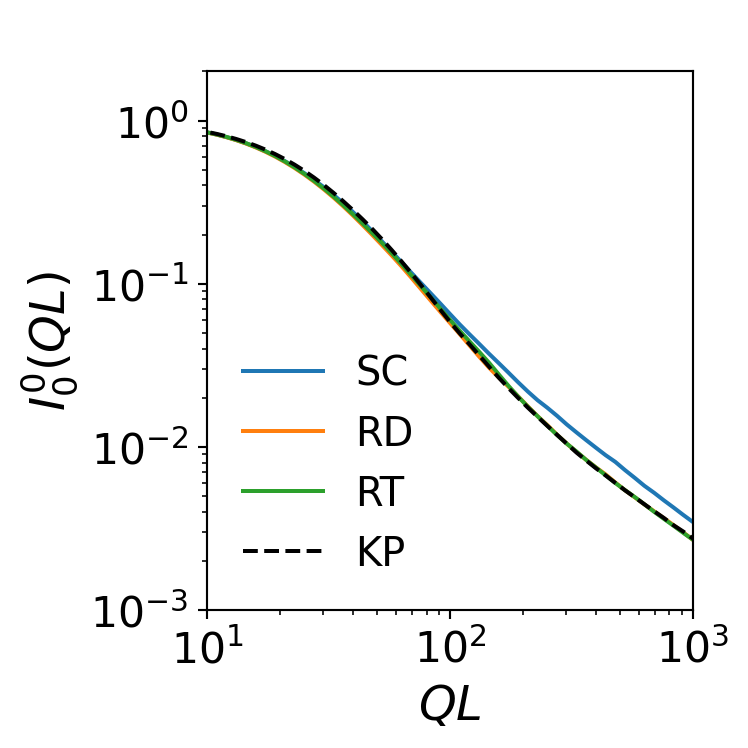

In [10]:
filename_quiescent = "./mat/sq_m1_64_"
filename_affine = "./mat/sq_m1_128_zz_1.0_"

kappa_list = np.array([50])
epsilon_list = [0]
parameters_list = []
for kappa in kappa_list:
    for epsilon in epsilon_list:
        parameters_list.append([kappa, epsilon])
        

fig = plt.figure(figsize=(4, 4),dpi=192)

for j, params in enumerate(parameters_list):
    kappa = params[0]
    epsilon = params[1]
    print(params)

    filename = filename_affine + "{:}_{:}.mat".format(float(params[0]),float(params[1]))

    data = loadmat(filename)
    S_q_list_param = data["S_q_list_param"][0]
    qq = data["qq"][0]

    ax = fig.add_subplot(1,1,j+1)
    ax.set_title(r'$l_p/l_b = {}$'.format(kappa),fontsize=18)
    ax.set_title(" ",fontsize=18)
    for i, grid in enumerate(['SC','RD','RT']):
        ax.plot(qq*N_backbone,S_q_list_param[i], label=grid)
    ax.plot(qq*N_backbone,S_q_list_param[3], '--', label='KP', color='k')

    filename = filename_quiescent + "{:}_{:}.mat".format(float(params[0]),float(params[1]))

    data = loadmat(filename)
    S_q_list_param = data["S_q_list_param"][0]
    qq = data["qq"][0]
    # ax.plot(qq*N_backbone,S_q_list_param[3], ':', label='Quiescent', color='#A0A0A0')
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(fontsize=15, frameon=False)
    ax.set_xlim([1e1,1e3])
    ax.set_ylim([1e-3,2])
    ax.set_xlabel(r'$QL$',fontsize=18)
    ax.set_ylabel(r'$I_0^0(QL)$',fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=16)

    # ax = fig.add_subplot(2,3,j+4)
    # for i, grid in enumerate(['SC','RD','RT']):
    #     ax.plot(qq*N_backbone,S_q_list_param[i]/S_q_list_param[3], label=grid)
    # # ax.plot(qq*N_backbone,S_q_list_param[3])
    
    # ax.set_xscale('log')
    # ax.set_yscale('log')
    # ax.set_ylim([1e-2,100])
    # ax.set_xlabel(r'$QL$',fontsize=18)
    # ax.set_ylabel(r'$S(QL)$',fontsize=18)
    # ax.tick_params(axis='both', which='major', labelsize=16)
    plt.tight_layout()


[50, 0]


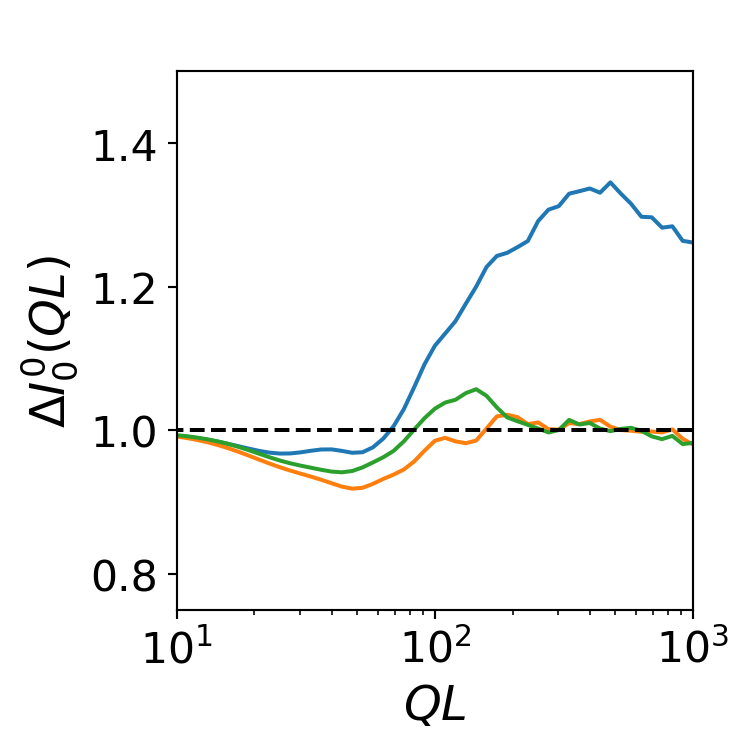

In [7]:
fig = plt.figure(figsize=(4, 4),dpi=192)

for j, params in enumerate(parameters_list):
    kappa = params[0]
    epsilon = params[1]
    print(params)

    ## Quiescent
    filename = filename_quiescent + "{:}_{:}.mat".format(float(params[0]),float(params[1]))

    data = loadmat(filename)
    S_q_list_param_Q = data["S_q_list_param"][0]
    qq = data["qq"][0]
    # ax.plot(qq*N_backbone,S_q_list_param_Q[3], '--', label='Quiescent', color='#A0A0A0')

    ## Deformed
    filename = filename_affine + "{:}_{:}.mat".format(float(params[0]),float(params[1]))

    data = loadmat(filename)
    S_q_list_param = data["S_q_list_param"][0]
    qq = data["qq"][0]

    ax = fig.add_subplot(1,1,j+1)
    ax.set_title(r'$l_p/l_b = {}$'.format(kappa),fontsize=18)
    ax.set_title(" ",fontsize=18)
    for i, grid in enumerate(['SC','RD','RT']):
        ax.plot(qq*N_backbone,S_q_list_param[i]/S_q_list_param[3], label=grid)
    ax.plot(qq*N_backbone,S_q_list_param[3]/S_q_list_param[3], '--', label='KP', color='k')
    
    ax.set_xscale('log')
    # ax.set_yscale('log')
    # ax.legend(fontsize=14, frameon=False)
    ax.set_xlim([1e1,1e3])
    ax.set_ylim([0.75,1.5])
    ax.set_xlabel(r'$QL$',fontsize=18)
    ax.set_ylabel(r'$\Delta I_0^0(QL)$',fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=16)

    # ax = fig.add_subplot(2,3,j+4)
    # for i, grid in enumerate(['SC','RD','RT']):
    #     ax.plot(qq*N_backbone,S_q_list_param[i]/S_q_list_param[3], label=grid)
    # # ax.plot(qq*N_backbone,S_q_list_param[3])
    
    # ax.set_xscale('log')
    # ax.set_yscale('log')
    # ax.set_ylim([1e-2,100])
    # ax.set_xlabel(r'$QL$',fontsize=18)
    # ax.set_ylabel(r'$S(QL)$',fontsize=18)
    # ax.tick_params(axis='both', which='major', labelsize=16)
    plt.tight_layout()


## xz

[50, 0]


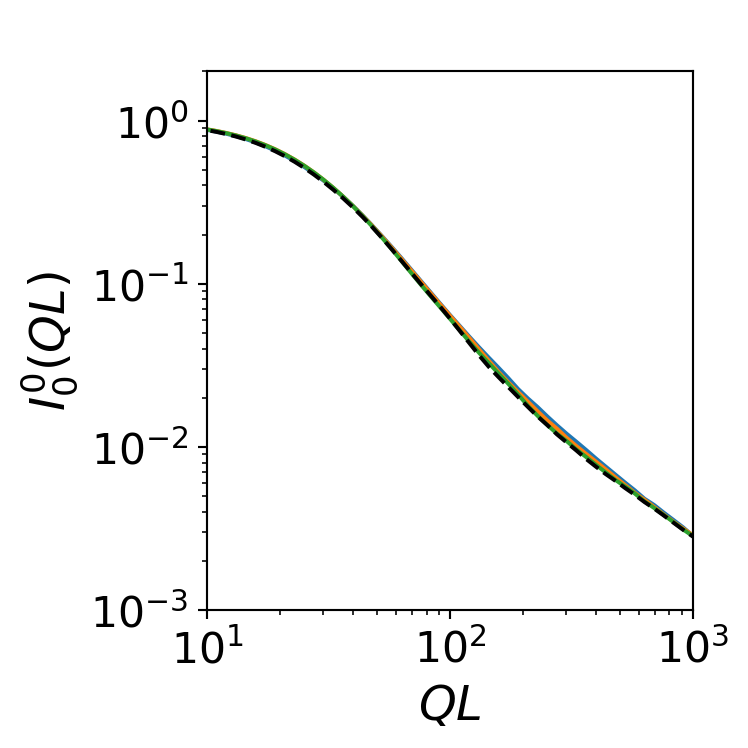

In [8]:
filename_quiescent = "./mat/sq_m1_64_"
filename_affine = "./mat/sq_m1_128_xz_1.0_"

kappa_list = np.array([50])
epsilon_list = [0]
parameters_list = []
for kappa in kappa_list:
    for epsilon in epsilon_list:
        parameters_list.append([kappa, epsilon])
        

fig = plt.figure(figsize=(4, 4),dpi=192)

for j, params in enumerate(parameters_list):
    kappa = params[0]
    epsilon = params[1]
    print(params)

    filename = filename_affine + "{:}_{:}.mat".format(float(params[0]),float(params[1]))

    data = loadmat(filename)
    S_q_list_param = data["S_q_list_param"][0]
    qq = data["qq"][0]

    ax = fig.add_subplot(1,1,j+1)
    ax.set_title(r'$l_p/l_b = {}$'.format(kappa),fontsize=18)
    ax.set_title(" ",fontsize=18)
    for i, grid in enumerate(['SC','RD','RT']):
        ax.plot(qq*N_backbone,S_q_list_param[i], label=grid)
    ax.plot(qq*N_backbone,S_q_list_param[3], '--', label='KP', color='k')

    filename = filename_quiescent + "{:}_{:}.mat".format(float(params[0]),float(params[1]))

    data = loadmat(filename)
    S_q_list_param = data["S_q_list_param"][0]
    qq = data["qq"][0]
    # ax.plot(qq*N_backbone,S_q_list_param[3], ':', label='Quiescent', color='#A0A0A0')
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    # ax.legend(fontsize=16, frameon=False)
    ax.set_xlim([1e1,1e3])
    ax.set_ylim([1e-3,2])
    ax.set_xlabel(r'$QL$',fontsize=18)
    ax.set_ylabel(r'$I_0^0(QL)$',fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=16)

    # ax = fig.add_subplot(2,3,j+4)
    # for i, grid in enumerate(['SC','RD','RT']):
    #     ax.plot(qq*N_backbone,S_q_list_param[i]/S_q_list_param[3], label=grid)
    # # ax.plot(qq*N_backbone,S_q_list_param[3])
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    # ax.set_ylim([1e-2,100])
    # ax.set_xlabel(r'$QL$',fontsize=18)
    # ax.set_ylabel(r'$S(QL)$',fontsize=18)
    # ax.tick_params(axis='both', which='major', labelsize=16)
    plt.tight_layout()


[50, 0]


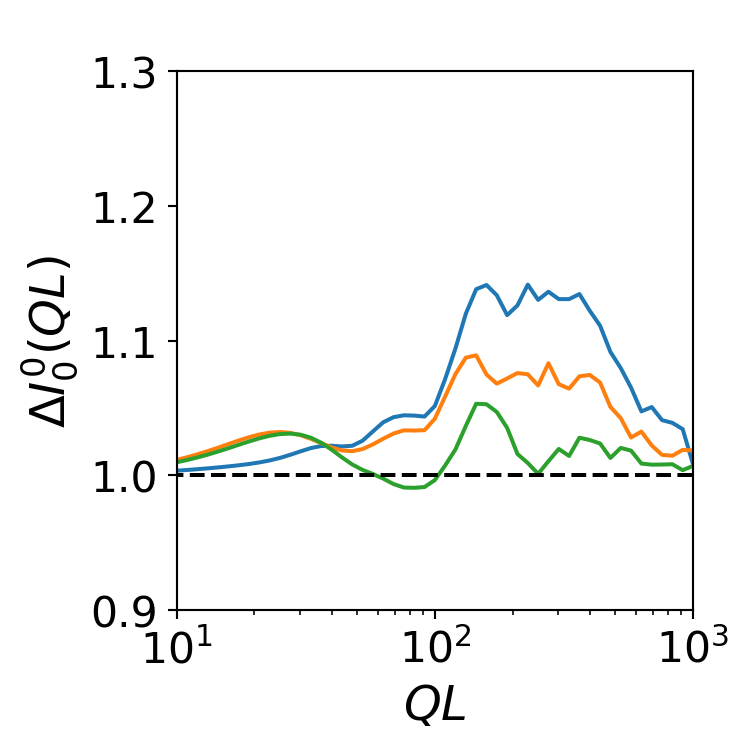

In [9]:
fig = plt.figure(figsize=(4, 4),dpi=192)

for j, params in enumerate(parameters_list):
    kappa = params[0]
    epsilon = params[1]
    print(params)

    ## Quiescent
    filename = filename_quiescent + "{:}_{:}.mat".format(float(params[0]),float(params[1]))

    data = loadmat(filename)
    S_q_list_param_Q = data["S_q_list_param"][0]
    qq = data["qq"][0]
    # ax.plot(qq*N_backbone,S_q_list_param_Q[3], '--', label='Quiescent', color='#A0A0A0')

    ## Deformed
    filename = filename_affine + "{:}_{:}.mat".format(float(params[0]),float(params[1]))

    data = loadmat(filename)
    S_q_list_param = data["S_q_list_param"][0]
    qq = data["qq"][0]

    ax = fig.add_subplot(1,1,j+1)
    ax.set_title(r'$l_p/l_b = {}$'.format(kappa),fontsize=18)
    ax.set_title(" ",fontsize=18)
    for i, grid in enumerate(['SC','RD','RT']):
        ax.plot(qq*N_backbone,S_q_list_param[i]/S_q_list_param[3], label=grid)
    ax.plot(qq*N_backbone,S_q_list_param[3]/S_q_list_param[3], '--', label='KP', color='k')
    
    ax.set_xscale('log')
    # ax.set_yscale('log')
    # ax.legend(fontsize=14, frameon=False)
    ax.set_xlim([1e1,1e3])
    ax.set_ylim([0.9,1.3])
    ax.set_xlabel(r'$QL$',fontsize=18)
    ax.set_ylabel(r'$\Delta I_0^0(QL)$',fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=16)

    # ax = fig.add_subplot(2,3,j+4)
    # for i, grid in enumerate(['SC','RD','RT']):
    #     ax.plot(qq*N_backbone,S_q_list_param[i]/S_q_list_param[3], label=grid)
    # # ax.plot(qq*N_backbone,S_q_list_param[3])
    
    # ax.set_xscale('log')
    # ax.set_yscale('log')
    # ax.set_ylim([1e-2,100])
    # ax.set_xlabel(r'$QL$',fontsize=18)
    # ax.set_ylabel(r'$S(QL)$',fontsize=18)
    # ax.tick_params(axis='both', which='major', labelsize=16)
    plt.tight_layout()
